# Example 1

Below is a short example of how to use the framework using data fetched from `yfinance`.


## Imports

In [1]:
import sys
import datetime
import os

import yfinance as yf
import pandas as pd

from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.getenv("local_path"))


## Fetching data using yfinance

In [2]:
ticker_symbol = "AAPL"

ticker = yf.Ticker(ticker_symbol)

historical_data = ticker.history(period="1y")  # data for the last year

data = historical_data.reset_index()
data.rename(columns = {'Date':'timestamp', 'Open': 'open', 'High': 'high', 'Low': 'low', 'Close': 'close', 'Volume': 'volume'}, inplace = True)
data.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

## Loading using dataloader

In [3]:
from backtesting.backtester.backtester import Backtester

In [4]:
class SimpleBacktester(Backtester):
    def __init__(self, market_data):
        super().__init__(market_data)
        
    def make_decision(self, data_point):
                
        if data_point.close < self.past_data[-1].close:
            decision = 1  # buy the whole portfolio
        elif data_point.close > self.past_data[-1].close:
            decision = -1  # sell the whole portfolio
        else:
            decision = 0  # hold
                        
        return decision


In [5]:
from backtesting.data.data_loader import MarketData

market_data = MarketData(data)  # wrap the DataFrame properly
tester = SimpleBacktester(market_data)
results = tester.run_simulation()
print(results)

Error in decision for 2024-06-10 00:00:00-04:00. list index out of range. Holding position.
[np.float64(25000.0), np.float64(25000.0), np.float64(25000.0), np.float64(25000.0), np.float64(25000.0), np.float64(25491.789109828995), np.float64(25491.789109828995), np.float64(24943.389616600045), np.float64(24682.868262336295), np.float64(24760.191618868626), np.float64(24760.191618868626), np.float64(24760.191618868626), np.float64(24760.191618868626), np.float64(24760.191618868626), np.float64(25480.826507914317), np.float64(25480.826507914317), np.float64(25480.826507914317), np.float64(25480.826507914317), np.float64(25480.826507914317), np.float64(25480.826507914317), np.float64(25480.826507914317), np.float64(25480.826507914317), np.float64(25813.371728395716), np.float64(25813.371728395716), np.float64(25813.371728395716), np.float64(25813.371728395716), np.float64(25283.29715011252), np.float64(25297.958673346842), np.float64(25297.958673346842), np.float64(25416.55972202982), np.f

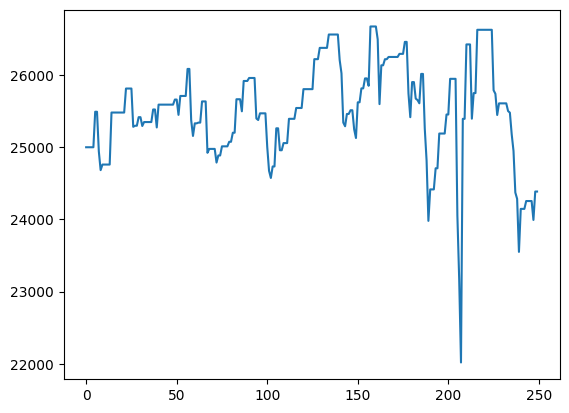

In [7]:
import matplotlib.pyplot as plt

plt.plot(results)